# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [126]:
import pandas as pd 
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [117]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [118]:
tips.drop('Unnamed: 0' , axis=1 , inplace=True)

### Step 5. Plot the total_bill column histogram

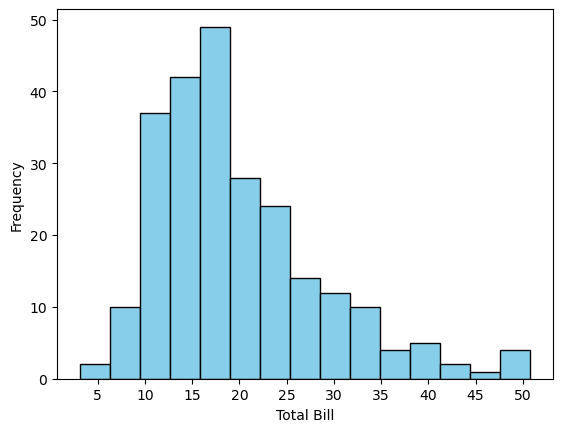

In [119]:
plt.hist(tips['total_bill'], color='skyblue', edgecolor='black', bins=15)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.locator_params(axis='x', nbins=20)
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0, 0.5, 'tips')

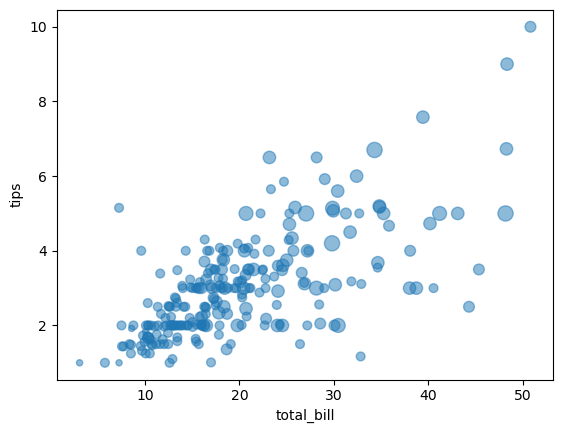

In [120]:
plt.scatter(tips['total_bill'] , tips['tip'], s=tips['size']*20, alpha=0.5)
plt.xlabel('total_bill')
plt.ylabel('tips')

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

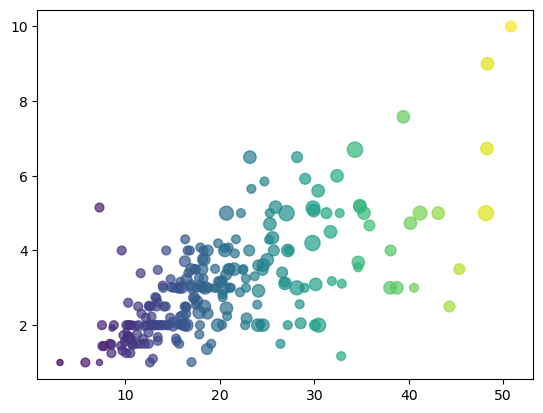

In [121]:
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*20, c=tips['total_bill'], alpha=0.7)

### Step 8. Present the relationship between days and total_bill value

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fri'), Text(1, 0, 'Sat'), Text(2, 0, 'Sun'), Text(3, 0, 'Thur')])

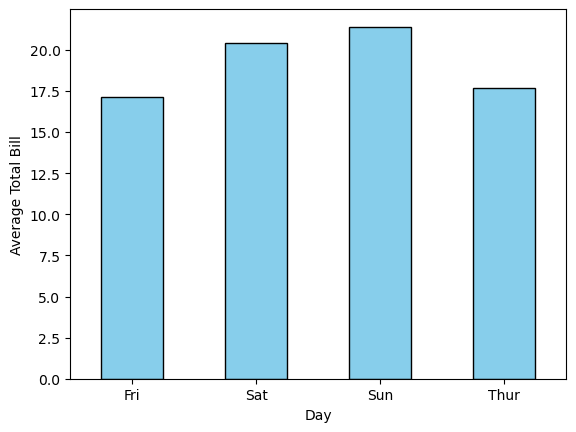

In [122]:
avg_total_bill_by_day = tips.groupby('day')['total_bill'].mean()
avg_total_bill_by_day.plot(kind='bar', color='skyblue',edgecolor = 'black',width = 0.5)
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.xticks(rotation=0)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

Text(0, 0.5, 'Day')

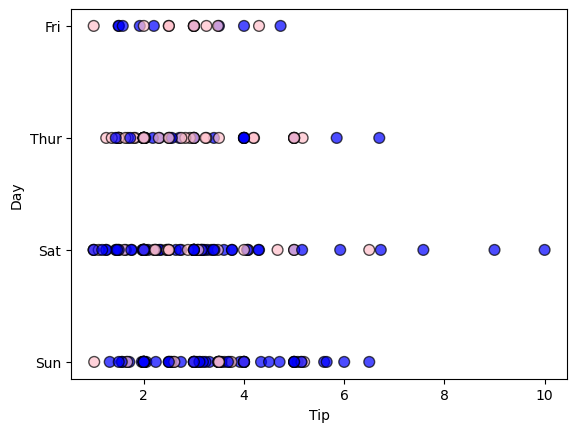

In [127]:
tips['sex_color'] = tips['sex'].map({'Female': 'pink', 'Male': 'blue'})
plt.scatter(tips['tip'], tips['day'], c= tips['sex_color'], cmap='coolwarm', edgecolor='black', s=60,alpha=0.7)
plt.xlabel('Tip')
plt.ylabel('Day')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

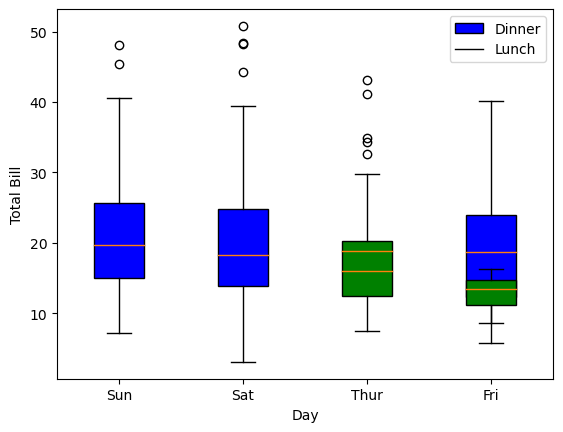

In [128]:
dinner_data = tips[tips['time'] == 'Dinner']
lunch_data = tips[tips['time'] == 'Lunch']

total_bill_dinner = [dinner_data[dinner_data['day'] == day]['total_bill'] for day in tips['day'].unique()]
total_bill_lunch = [lunch_data[lunch_data['day'] == day]['total_bill'] for day in tips['day'].unique()]

plt.boxplot(total_bill_dinner, widths=0.4, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.boxplot(total_bill_lunch, widths=0.4, patch_artist=True, boxprops=dict(facecolor='green'))

plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.xticks(range(1, len(tips['day'].unique()) + 1), tips['day'].unique())
plt.legend(['Dinner', 'Lunch'])

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

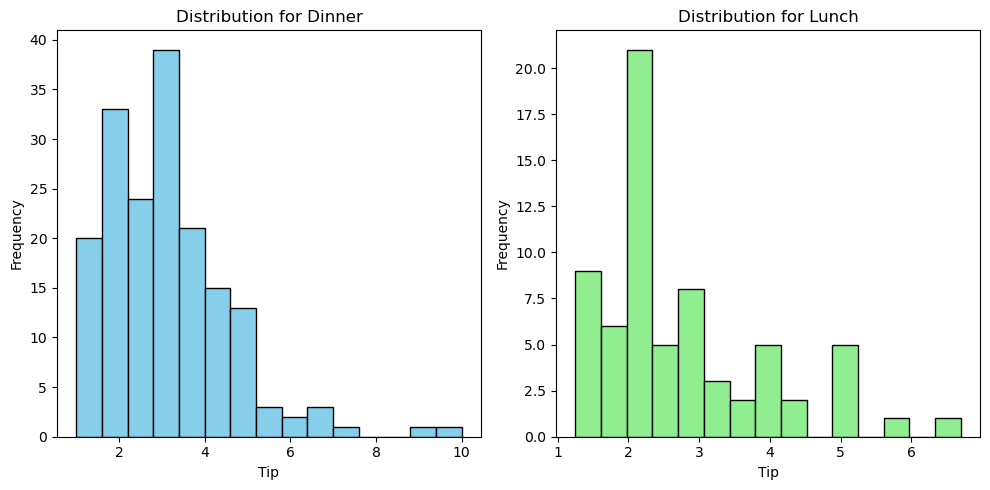

In [129]:
dinner_data = tips[tips['time'] == 'Dinner']
lunch_data = tips[tips['time'] == 'Lunch']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(dinner_data['tip'], color='skyblue', edgecolor='black', bins=15)
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Distribution for Dinner')

plt.subplot(1, 2, 2)
plt.hist(lunch_data['tip'], color='lightgreen', edgecolor='black', bins=15)
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Distribution for Lunch')
plt.tight_layout()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

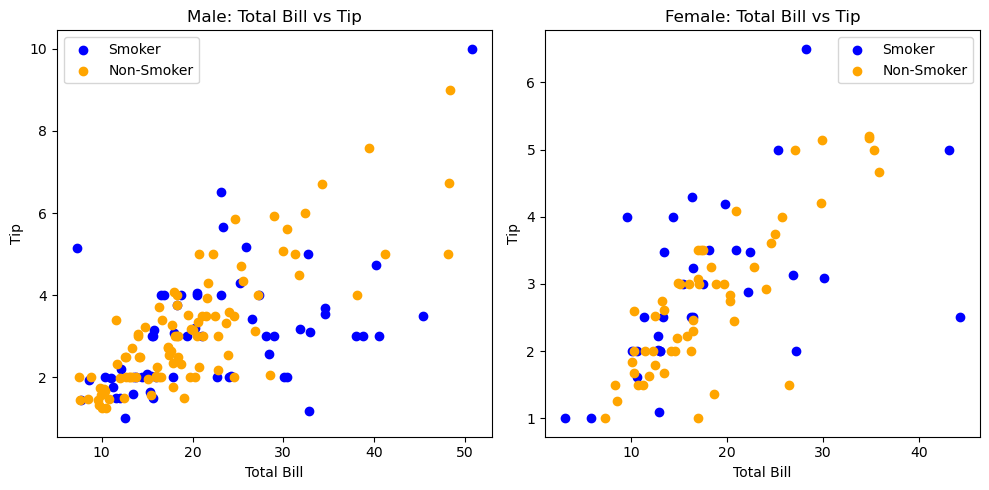

In [134]:
male_data = tips[tips['sex'] == 'Male']
female_data = tips[tips['sex'] == 'Female']
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.scatter(male_data[male_data['smoker'] == 'Yes']['total_bill'], male_data[male_data['smoker'] == 'Yes']['tip'], color='blue', label='Smoker')
plt.scatter(male_data[male_data['smoker'] == 'No']['total_bill'], male_data[male_data['smoker'] == 'No']['tip'], color='orange', label='Non-Smoker')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Male: Total Bill vs Tip')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(female_data[female_data['smoker'] == 'Yes']['total_bill'], female_data[female_data['smoker'] == 'Yes']['tip'], color='blue', label='Smoker')
plt.scatter(female_data[female_data['smoker'] == 'No']['total_bill'], female_data[female_data['smoker'] == 'No']['tip'], color='orange', label='Non-Smoker')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Female: Total Bill vs Tip')
plt.legend()

plt.tight_layout()

### BONUS: Create your own question and answer it using a graph.

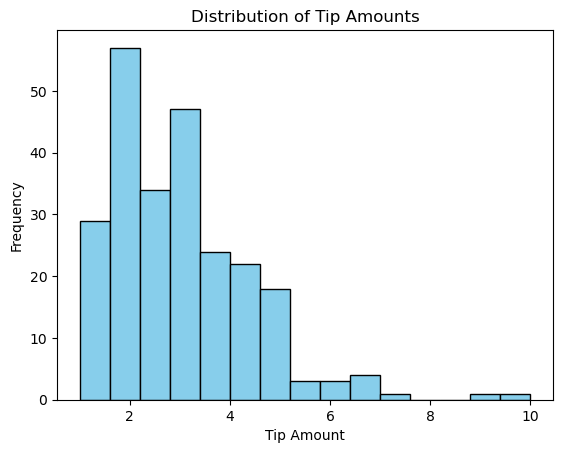

In [147]:
#What is the distribution of the tip amounts in the dataset?


plt.hist(tips['tip'], color='skyblue', edgecolor='black', bins=15)
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Amounts')
plt.show()